In [1]:
from modelconductor.modelhandler import FixedLengthHistoricalRegressionModelHandler
target_keys = ["A_pred", "B_pred", "C_pred", "D_pred"]
input_keys = ["A", "B", "C", "D"]
control_keys = ['time']
window_size = 10
step_size = 0.1
model=FixedLengthHistoricalRegressionModelHandler(
    target_keys=target_keys,
    input_keys=input_keys,
    control_keys=control_keys,
    window_size=window_size, step_size=step_size)

In [2]:
import asyncio
import nest_asyncio
nest_asyncio.apply()

from modelconductor.experiment_mqtt import MqttExperiment

ex = MqttExperiment()
ex.model = model

headers = ex.model.input_keys + ex.model.target_keys + ex.model.control_keys
ex.logger = ex.initiate_logging(headers=headers)

In [3]:
ex.run()

running execute_model_loop!
waiting for buffer_equal_window


[2020-11-11 13:18:56,642] :: INFO - Finished processing state new exit callbacks.
[2020-11-11 13:18:56,645] :: INFO - Finished processing state connected enter callbacks.


{'time': 0.0, 'A': 1.5763201123, 'B': 5.0266560658, 'C': 6.213371944, 'D': 8.0254115618, 'TIMING_client_request_timestamp': 1605093539.721626}
False
{'time': 0.1, 'A': 1.4738452626, 'B': 6.0336314839, 'C': 6.8367830386, 'D': 9.7764442809, 'TIMING_client_request_timestamp': 1605093539.82557}
False
{'time': 0.2, 'A': 2.2998480633, 'B': 5.4094396051, 'C': 7.0702083183, 'D': 10.125638097, 'TIMING_client_request_timestamp': 1605093539.9374878}
False
{'time': 0.3, 'A': 1.77442053, 'B': 5.8933485756, 'C': 6.8010934811, 'D': 11.6414912127, 'TIMING_client_request_timestamp': 1605093540.0418217}
False
{'time': 0.4, 'A': 2.7555564927, 'B': 6.3959069782, 'C': 7.1756242682, 'D': 12.4101619619, 'TIMING_client_request_timestamp': 1605093540.145329}
False
{'time': 0.5, 'A': 2.1490890899, 'B': 6.2589186831, 'C': 7.3655697716, 'D': 13.8409216903, 'TIMING_client_request_timestamp': 1605093540.2597709}
False
{'time': 0.6, 'A': 3.1679466737, 'B': 6.0468314217, 'C': 7.6934138703, 'D': 14.8940465491, 'TIMING

{'time': 4.8, 'A': 11.4358217278, 'B': 10.6808453868, 'C': 15.7441935009, 'D': 56.866334171, 'TIMING_client_request_timestamp': 1605093544.9110098}
True
{'time': 4.9, 'A': 11.2909336146, 'B': 10.0472438649, 'C': 16.2782534612, 'D': 57.5477007474, 'TIMING_client_request_timestamp': 1605093545.0229897}
True
{'time': 5.0, 'A': 11.5297128815, 'B': 10.8588847385, 'C': 16.5025981957, 'D': 58.8656156382, 'TIMING_client_request_timestamp': 1605093545.1361105}
True
{'time': 5.1, 'A': 11.5125306398, 'B': 11.0807647907, 'C': 16.3020708547, 'D': 59.0085947509, 'TIMING_client_request_timestamp': 1605093545.2417686}
True
{'time': 5.2, 'A': 12.3428337432, 'B': 10.3399283119, 'C': 17.0129140598, 'D': 60.8695293997, 'TIMING_client_request_timestamp': 1605093545.3538122}
True
{'time': 5.3, 'A': 11.8726757533, 'B': 10.6929937837, 'C': 17.4456660131, 'D': 61.4062595422, 'TIMING_client_request_timestamp': 1605093545.4684932}
True
{'time': 5.4, 'A': 12.3132227904, 'B': 10.8135068227, 'C': 17.4863760292, 'D'

In [4]:
ex.log_path
import pandas as pd
results = pd.read_csv(ex.log_path)
results.head()

,A,B,C,D,A_pred,B_pred,C_pred,D_pred,time
2020-11-11 13:19:01.773779,1.576320,5.026656,6.213372,8.025412,3.491077,6.835087,8.515274,18.512497,0.0
2020-11-11 13:19:02.787082,2.907287,6.867058,8.125107,17.084110,5.621497,7.235152,10.438994,27.619980,0.9
2020-11-11 13:19:03.791700,5.697089,7.780794,10.558254,27.544087,7.197162,8.395414,12.360664,37.774794,1.9
2020-11-11 13:19:04.795788,7.409619,7.931573,12.048195,36.541482,9.276341,9.551163,14.303728,46.542188,2.8
2020-11-11 13:19:05.806497,9.305677,9.684983,14.225682,45.427592,10.398951,10.467921,16.202901,55.407636,3.7


In [5]:
inputs = pd.read_csv(ex.log_path + "_inputs", names = ["time"] + input_keys + ["shit"])
outputs = results[target_keys]
output_time = results['time'] + window_size * step_size
inputs.head()

,time,A,B,C,D,shit
0,0.0,1.576320,5.026656,6.213372,8.025412,1.605094e+09
1,0.1,1.473845,6.033631,6.836783,9.776444,1.605094e+09
2,0.2,2.299848,5.409440,7.070208,10.125638,1.605094e+09
3,0.3,1.774421,5.893349,6.801093,11.641491,1.605094e+09
4,0.4,2.755556,6.395907,7.175624,12.410162,1.605094e+09


In [6]:
inputs.tail()

,time,A,B,C,D,shit
82,8.2,18.345630,13.329876,23.305514,90.492166,1.605094e+09
83,8.3,17.772288,13.451112,22.718725,91.896039,1.605094e+09
84,8.4,18.689329,13.464733,22.900853,92.295014,1.605094e+09
85,8.5,18.967704,13.560054,23.710224,93.977149,1.605094e+09
86,8.6,18.353233,13.906427,23.214276,94.500278,1.605094e+09


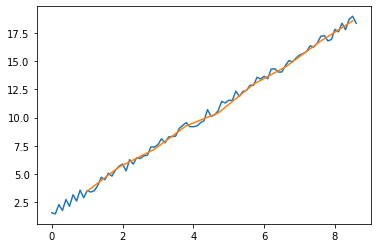

In [7]:
from matplotlib import pyplot as plt
plt.plot(inputs['time'], inputs['A'])
plt.plot(output_time, outputs['A_pred'])
plt.show()